# 圖論（Graph Theory）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 圖
一個__圖__ $G$ 由  
一些**點**  
還有一些__邊__構成  
這裡邊指的是一些兩個點的集合  
**點集**通常記作 $V(G)$  
__邊集__通常記作 $E(G)$  

V(G) = [0, 1, 2, 3]
E(G) = [(0, 1), (0, 3), (1, 2), (2, 3)]


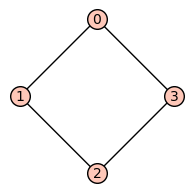

In [1]:
g = graphs.CycleGraph(4)
print("V(G) = %s"%g.vertices())
print("E(G) = %s"%g.edges(labels=False))
g.show(figsize=[2,2])

點沒有一定的位置  
（也沒有一定要用 $0,\ldots,n-1$ 標號）  
上下兩張圖是一模一樣的

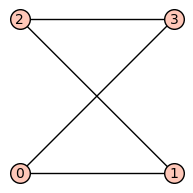

In [2]:
pos = {0:(0,0), 1:(1,0), 2:(0,1), 3:(1,1)}
g.set_pos(pos)
g.show(figsize=[2,2])

Sage 裡的 `graphs` 裡  
內建了很多圖  
許多圖也把一個*常用*的點座標設定好了

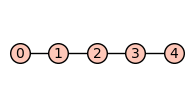

In [3]:
### Path
g = graphs.PathGraph(5)
g.show(figsize=[2,2])

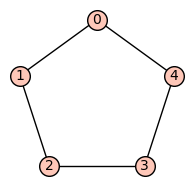

In [4]:
### Cycle
g = graphs.CycleGraph(5)
g.show(figsize=[2,2])

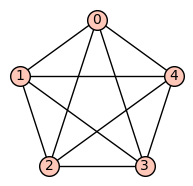

In [5]:
### complete graph
g = graphs.CompleteGraph(5)
g.show(figsize=[2,2])

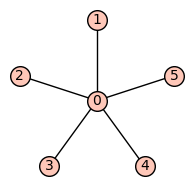

In [6]:
### star graph
g = graphs.StarGraph(5)
g.show(figsize=[2,2])

也可以從頭建造一個圖  
設定好點集 `V` 以及邊集 `E`  
並用 `Graph([V, E])` 建立一個圖

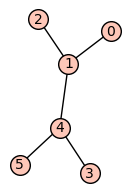

In [7]:
V = [0,1,2,3,4,5]
E = [(0,1), (1,2), (1,4), (3,4), (4,5)]
g = Graph([V, E])
g.show(figsize=[2,2])

有需要可以再增加點或邊  
（如果邊的點原本不存在  
則會自動加入）

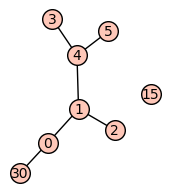

In [8]:
g.add_vertex(15)
g.add_edge(0,30)
g.show(figsize=[2,2])

若 `g` 是 Sage 中的一個圖  
則可以用 `g.show()` 來顯示  
繪圖有許多參數可以調整  
參考[官方說明書](http://doc.sagemath.org/html/en/reference/plotting/sage/graphs/graph_plot.html)

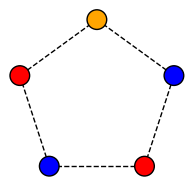

In [9]:
g = graphs.CycleGraph(5)
g.show(figsize=[2,2],
       vertex_labels=False,
       vertex_colors={'red':[1,3], 'blue':[2,4], 'orange':[0]},
       edge_style='--'
      )

### 圖同構
如果兩個圖可以把點和點對起來  
使得相對應的邊也對起來  
則兩個圖則視為**同構**

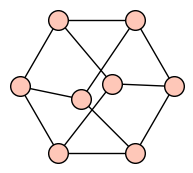

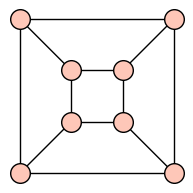

In [10]:
g = graphs.CubeGraph(3)
pos = g.get_pos()
pos['010'] = (0.7,0.9)
pos['101'] = (0.3,0.7)
g.set_pos(pos)
g.show(figsize=[2,2], vertex_labels=False)

V = [0,1,2,3,4,5,6,7]
E = [(0,1), (1,2), (2,3), (3,0), (0,4), (1,5), (2,6), (3,7), (4,5), (5,6), (6,7), (7,4)]
pos = {0:(0,0), 1:(3,0), 2:(3,3), 3:(0,3), 4:(1,1), 5:(2,1), 6:(2,2), 7:(1,2)}
h = Graph([V, E], pos=pos)
h.show(figsize=[2,2], vertex_labels=False)

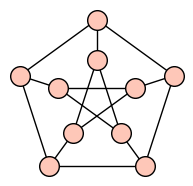

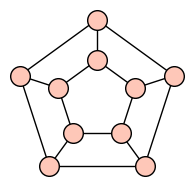

In [11]:
Petersen = graphs.PetersenGraph()
Peterson = Petersen.copy()
Peterson.delete_edges([(5,7), (7,9), (9,6), (6,8), (8,5)])
Peterson.add_edges([(5,6), (6,7), (7,8), (8,9), (9,5)])
Petersen.show(figsize=[2,2], vertex_labels=False)
Peterson.show(figsize=[2,2], vertex_labels=False)

## 圖的不變量
圖會因為標號的不同而有些差異  
但有些性質並不會隨著標號改變  
比如說點數、邊數  
這些性質叫作圖的**不變量**  
它們可以用來幫忙判斷圖是否同構

若 `g` 是 Sage 裡的圖  
則 `g.order()` 回傳點數  
而 `g.size()` 回傳邊數

In [12]:
g = graphs.PetersenGraph()
print(g.order())
print(g.size())

10
15


### 度數
圖中一個點相連的邊數  
稱作這個點的**度數**

比如說下圖中  
點 0 的度數為 5  
其餘點的度數皆為 1

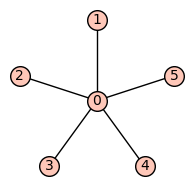

In [13]:
g = graphs.StarGraph(5)
g.show(figsize=[2,2])

把每個點的度數收集起來  
所形成（元素可重覆）的集合  
稱作圖的**度數數列**  
同構的圖必須要有相同的度數數列

In [14]:
g.degree_sequence()

[5, 1, 1, 1, 1, 1]

#### 圖論第一定理
圖的度數總合  
等於兩倍的邊數

In [15]:
print(sum(g.degree_sequence()))
print(2 * g.size())

10
10


因此度數數列的總合永遠是偶數  
而度數為奇數的點一定有偶數個

### 連通
若一個圖中的任兩點  
都可以經由一連串的邊接起來  
則這個圖為**連通的**

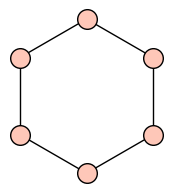

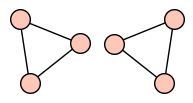

In [16]:
g = graphs.CycleGraph(6)
h = graphs.CompleteGraph(3).disjoint_union(graphs.CompleteGraph(3))
g.show(figsize=[2,2], vertex_labels=False)
h.show(figsize=[2,2], vertex_labels=False)

大的圖不見得  
一眼就可以看出是否連通  
後面我們會介紹演算法  
來判斷圖的連通性

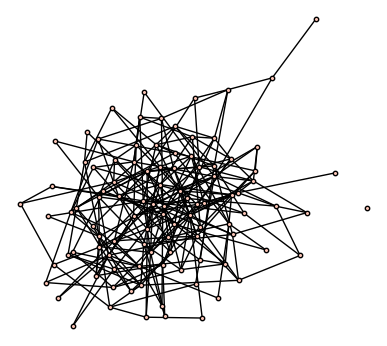

False

In [17]:
g = graphs.RandomGNP(100,0.05)
g.show(vertex_labels=False, vertex_size=10)
g.is_connected()

### 路徑數  
一個從點 $i$ 到點 $j$ 的路徑  
指的是一群點 $i = v_0\sim v_1\sim\cdots\sim v_k =j$  
這裡 $k$ 是路徑的長度  
定義 $p_k(i,j)$ 為  
$i$ 和 $j$ 中長度為 $k$ 的路徑數

固定一個長度 $k$ 以及一個整數 $d$  
圖上有幾組點 $(i,j)$ 滿足 $p_k(i,j)=d$  
這樣的組數也是圖的不變量

比如說 $p_1(i,j)=1$ 的組數  
就是圖的邊數

#### 相鄰矩陣
一個 $n$ 個點的圖的**相鄰矩陣**  
是一個 $n\times n$ 的矩陣  
如果點 $i,j$ 有邊則矩陣的 $i,j$-項為 $1$  
如果點 $i,j$ 沒邊則矩陣的 $i,j$-項為 $0$

In [18]:
g = graphs.PathGraph(4)
g.adjacency_matrix()

[0 1 0 0]
[1 0 1 0]
[0 1 0 1]
[0 0 1 0]

#### 定理
若 $A$ 為圖 $G$ 的相鄰矩陣  
則 $A^k$ 的 $i,j$-項  
等於 $p_k(i,j)$

In [19]:
g = graphs.PathGraph(4)
A = g.adjacency_matrix()
A**2

[1 0 1 0]
[0 2 0 1]
[1 0 2 0]
[0 1 0 1]

回顧 `Petersen` 及 `Peterson`

In [20]:
A1 = Petersen.adjacency_matrix()
A2 = Peterson.adjacency_matrix()
print("A1^2 =")
print(A1**2)
print("A2^2 =")
print(A2**2)

A1^2 =
[3 0 1 1 0 0 1 1 1 1]
[0 3 0 1 1 1 0 1 1 1]
[1 0 3 0 1 1 1 0 1 1]
[1 1 0 3 0 1 1 1 0 1]
[0 1 1 0 3 1 1 1 1 0]
[0 1 1 1 1 3 1 0 0 1]
[1 0 1 1 1 1 3 1 0 0]
[1 1 0 1 1 0 1 3 1 0]
[1 1 1 0 1 0 0 1 3 1]
[1 1 1 1 0 1 0 0 1 3]
A2^2 =
[3 0 1 1 0 0 2 0 0 2]
[0 3 0 1 1 2 0 2 0 0]
[1 0 3 0 1 0 2 0 2 0]
[1 1 0 3 0 0 0 2 0 2]
[0 1 1 0 3 2 0 0 2 0]
[0 2 0 0 2 3 0 1 1 0]
[2 0 2 0 0 0 3 0 1 1]
[0 2 0 2 0 1 0 3 0 1]
[0 0 2 0 2 1 1 0 3 0]
[2 0 0 2 0 0 1 1 0 3]


會發現 `Petersen`  
完全沒有一組 $(i,j)$ 滿足 $p_2(i,j)=2$  
但 `Peterson`  
卻有 8 組  
因此兩圖不同構

### 最小圈
圖上的一個**圈**  
指的是一個起點和終點相同的路徑  
而此外其餘任兩點皆不重覆

圈的長度為圈上的邊數  
一個圈上的最小圈的長度  
也是圈的不變量  
可以用 `g.girth()` 來計算

In [21]:
print(Petersen.girth())
print(Peterson.girth())

5
4


再次看到兩圖不同構

### 生成樹
一個圖如果是連通的  
而且圖上沒有圈  
則被成為**樹**


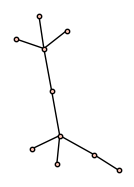

In [22]:
g = graphs.RandomTree(10)
g.show(figsize=[2,2], vertex_labels=False, vertex_size=10)

$n$ 個點上的樹一定剛好 $n-1$ 條邊

一個圖上選 $n-1$ 條邊  
使得這些邊形成一個樹  
則稱為這個圖的**生成樹**  

生成樹的個數是圖的不變量

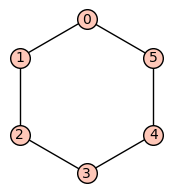

In [23]:
g = graphs.CycleGraph(6)
g.show(figsize=[2,2])

#### 拉普拉斯矩陣
給定一個圖 $G$  
令 $D$ 為一個對角線為 $G$ 的度數列表的對角矩陣  
令 $A$ 為 $G$ 的相鄰矩陣  
則 $G$ 的拉普拉斯矩陣定義為 $D-A$

In [24]:
g = graphs.CycleGraph(6)
L = g.laplacian_matrix()
L

[ 2 -1  0  0  0 -1]
[-1  2 -1  0  0  0]
[ 0 -1  2 -1  0  0]
[ 0  0 -1  2 -1  0]
[ 0  0  0 -1  2 -1]
[-1  0  0  0 -1  2]

#### 矩陣樹定理
令 $L$ 為圖 $G$ 的拉普拉斯矩陣  
而 $L'$ 為將 $L$ 的第零行第零列去掉的矩陣  
則 $|\det(L')|$ 為圖生成樹的個數

In [25]:
Lprime = L[1:,1:]
Lprime.determinant()

6

## 搜尋演算法
圖上的搜尋演算法  
目的是在圖上有系統地搜尋所有點  
（或是邊、或是都找）

以下是兩種常見的搜尋演算法：

1. 深度優先搜尋 Depth-first search（DFS）
2. 廣度優先搜尋 Breadth-first search（BFS）

這兩種演算法也可以用來判斷一個圖是否連通

In [26]:
### 先執行這段程式碼

def DFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.depth_first_search(v):
        if searched:
            for i in range(1,len(searched)+1):
                if g.has_edge(new,searched[-i]):
                    parent = searched[-i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def BFS_tree(g, v):
    searched = []
    arcs = []
    for new in g.breadth_first_search(v):
        if searched:
            for i in range(len(searched)):
                if g.has_edge(new,searched[i]):
                    parent = searched[i]
                    break;
            arcs.append((parent,new))
        searched.append(new)
    return arcs

def greedy_coloring(g, color_order=None):
    n = g.order()
    ### ideally, len(color_order) == n
    if color_order == None:
        color_order = g.vertices()
    color_order = list(color_order) ### change the type in case it is a generator
    num_c = {k: [] for k in range(n)}
    for s in range(n):
        new = color_order[s]
        for k in range(n):
            for u in num_c[k]:
                if g.has_edge(u,new):
                    break;
            else:
                num_c[k].append(new)
                break;
    num_c_used = [k for k in range(n) if num_c[k]]
    greedy_chi = len(num_c_used)
    colors = rainbow(greedy_chi) 
    c = {colors[k]: num_c[k] for k in range(greedy_chi)}
    return c

def illustrate_FS(g, v, alg='DFS', searching_tree=True, coloring=False):
    ### g should have its position saved
    ### if not do g.plot(save_pos) first
    if alg == 'DFS':
        arcs = DFS_tree(g,v)
        full_name = 'Depth-First Search at {}'.format(v)
    if alg == 'BFS':
        arcs = BFS_tree(g,v)
        full_name = 'Breadth-First Search at {}'.format(v)
    steps = len(arcs)
    pic1 = g.plot()
    
    if coloring:
        color_order = [v] + [arc[1] for arc in arcs]
        c = greedy_coloring(g, color_order)
    else:
        c = {}
        
    @interact
    def _(step=slider(list(range(steps+1))), t = text_control(full_name)):
        g.set_pos(g.layout())
        g_pos = g.get_pos()
        arcs_show = arcs[:step] if searching_tree else []
        pic2 = DiGraph([g.vertices(),arcs_show], pos=g_pos).plot(edge_color='red', vertex_colors=c)
        unreached = [arc[1] for arc in arcs[step:]]
        cover = Graph([unreached,[]], pos={u: g_pos[u] for u in unreached}).plot()
        p = pic1 + pic2 + cover
        p.axes(False)
        p.show()

### 深度優先搜尋 Depth-first search（DFS）
能往前就往前  
不能再往前時，往回退到還能往前的點繼續

例子：走迷宮

In [27]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'DFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE4NzkyMzg0ZDA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


### 廣度優先搜尋 Breadth-first search（BFS）
先把附近找完  
附近沒了，再從第一個附近還沒找完的點繼續

例子：找兩點之間的最短路徑

In [28]:
g = graphs.PetersenGraph()
v = 0
illustrate_FS(g, v, 'BFS')

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZmE4NzgzZjY0NTA+IHdpdGggMiB3aWRnZXRzCiAgc3RlcDogU2VsZWN0aW9uU2xpZGVyKGRlc2NyaXB0aW9uPXUnc3RlcCfigKY=


## 動手試試看

##### 練習 1
定義一個函數 `spanning_tree_count(g)` 其功能為：  
傳入一個圖 `g`  
回傳此圖的生成樹的個數  

提示：拉普拉斯矩陣

In [0]:
### your answer here

##### 練習 2
定義一個函數 `is_conn(g)` 其功能為：  
傳入一個圖 `g`  
若 `g` 連通則回傳 `True` 否則回傳 `False` 

（有辦法利用 `spanning_tree_count` 判斷嗎？）  

In [0]:
### your answer here

##### 練習 3
定義一個函數 `is_tree(g)` 其功能為：  
傳入一個圖 `g`  
若 `g` 為樹則回傳 `True` 否則回傳 `False`  

（有辦法利用 `spanning_tree_count` 判斷嗎？）  

In [0]:
### your answer here

##### 練習 4
定義一個函數 `to_tree(g)` 其功能為：  
傳入一個連通圖 `g`  
將 `g` 多餘的邊移除，使其成為一個樹（可使用 `g.delete_edge(e)` 移除邊）  
回傳 `g`  

提示：  
使用 `is_conn` 幫助判斷哪些邊需要移除  
先將某個邊 `e` 移除  
若移除之後圖變得不連通，那就把 `e` 加回去（`g.add_edge(e)`）  

In [0]:
### your answer here

##### 獨立集
給定一個圖 $G$ ，令 $S$ 為 $V(G)$ 的子集合  
若 $S$ 裡面的任兩個點在圖 $G$ 中都不相鄰，則稱 $S$ 為 $G$ 的獨立集  

一個圖 $G$ 可以有很多不同的獨立集  
若 $S$ 為圖 $G$ 元素個數最多的獨立集，則稱 $S$ 為 $G$ 的最大獨立集  

##### 練習 5
定義一個函數 `is_independent_set(g, s)` 其功能為：  
傳入一個圖 `g` 和一個點集 `s`  
`s` 為 `V(g)` 的子集合  
若 `s` 為 `g` 的獨立集則回傳 `True`，否則回傳 `False`  

提示：  
使用 `Combinations(s, 2)` 將所有的可能取出  
接著用 `g.has_edge(v1, v2)` 判斷是否相鄰  

In [0]:
### your answer here

##### 練習 6
定義一個函數 `all_independent_set(g)` 其功能為：  
傳入一個圖 `g`  
回傳一個 `list` 為 `g` 的所有獨立集  

提示：  
1. 開一個空的 `list`  
2. 使用 `Combinations(g.vertices(), n)` , n = 0, 1, 2, ..., k 將所有 `V(g)` 的子集合取出  
3. 若取出的子集合為 `g` 的獨立集就把它加入到 `list` 中  

In [0]:
### your answer here

##### 練習 7
定義一個函數 `max_independent_set(g)` 其功能為：  
傳入一個圖 `g`  
回傳一個 `g` 的最大獨立集  

In [0]:
### your answer here

先執行下面這段程式碼，觀察圖 `g` 跟印出的 `list` 之間的關聯性  

In [0]:
g = graphs.PetersenGraph()
g += g
g.show()
list(g.depth_first_search(0))

##### 練習 8
定義一個函數 `has_path(g, v1, v2)` 其功能為：  
傳入一個圖 `g` 和兩個點 `v1`, `v2`  
若 `v1` 和 `v2` 之間能夠用一串邊連接起來，就回傳 `True`，否則回傳 `False`  

提示：想想看能不能使用 `g.depth_first_search` 來幫助判斷  

In [0]:
### your answer here

##### 練習 9
定義一個函數 `to_conn(g)` 其功能為：  
傳入一個圖 `g`  
若 `g` 不是連通圖，補一些缺失的邊，使其成為連通圖（可使用 `g.add_edge(e)` 補上邊）  
回傳 `g`  

提示：用上面的 `has_path` 函數判斷要補那些邊  

In [0]:
### your answer here

##### 練習 10
定義一個函數 `find_path(g, v1, v2)` 其功能為：  
傳入一個連通圖 `g` 和兩個點 `v1`, `v2`  
回傳一個 `list` 裡面為一串將 `v1` 和 `v2` 連接起來的邊  
（`list` 的格式必須是 `[(v1,v(1)),(v(1),v(2)), ... ,(v(k-1),v(k)),(v(k),v2)]`，`v(1)`, `v(2)`, ..., `v(k)` 為 `g` 中的點）  

請先將 `g` 在函數內複製一份，不要直接改寫 `g` 的內容  

```Python
def find_path(g, v1, v2):
    h = g.copy()
```

提示：  
考慮這幾個函數 `to_tree`, `has_path`, `h.delete_edge`, `h.add_edge`, `h.depth_first_search`  
我們先把 `h` 變成一個樹，這樣可以保證任兩點之間只有一種唯一的走法  
接下來刪除從 `v1` 走到 `v2` 之間不會經過的邊（想想看要用哪個函數幫忙判斷哪些是要刪除的邊）  
此時 `h` 上所剩的邊就是連接 `v1` 和 `v2` 的路徑  
最後，試著用 `h.depth_first_search` 造出題目要的 `list`  

In [0]:
### your answer here

完成 **練習10** 後，可以測試以下的程式  

In [0]:
### 先執行這段程式碼

def illustrate(g, arcs, color='blue'):
    g.set_pos(g.layout())
    steps = len(arcs)
    pic1 = g.plot()
    @interact
    def _(step=slider(list(range(steps+1)))):
        g_pos = g.get_pos()
        arcs_show = arcs[:step]
        pic2 = DiGraph([g.vertices(),arcs_show], pos=g_pos).plot(edge_color=color)
        p = pic1 + pic2
        p.axes(False)
        p.show()

In [0]:
### 執行看看會有甚麼效果
### g, start_vertex, end_vertex 這三個可以自己改

g = graphs.RandomGNP(25, 0.2)
to_conn(g)
start_vertex = 0
end_vertex = 24
illustrate(g, find_path(g, start_vertex, end_vertex))